Validation set necessary for hyperparameter tuning
- The hyperparameters are all non-trainable parameters  
- For example, experiment with different learning rates

Validation set is used to monitor training

In [1]:
from tensorflow.keras.datasets import imdb

((train_data, train_labels), (test_data, test_labels)) = imdb.load_data(num_words = 10000)

import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros( (len(sequences), dimension) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [2]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Validation Set:** The first 10000 samples from the training set are sliced away  
**The partial training set:** the remainder of the training set - now reduced in size by 10000 samples.   
The labels are similarly divided between validation and partial.

In [3]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Epoch 1/20
30/30 [==============================] - 4s 94ms/step - loss: 0.5360 - accuracy: 0.7442 - val_loss: 0.3948 - val_accuracy: 0.8569
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3082 - accuracy: 0.8995 - val_loss: 0.3162 - val_accuracy: 0.8779
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2222 - accuracy: 0.9262 - val_loss: 0.2782 - val_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1719 - accuracy: 0.9433 - val_loss: 0.2878 - val_accuracy: 0.8855
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1414 - accuracy: 0.9529 - val_loss: 0.3051 - val_accuracy: 0.8791
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1142 - accuracy: 0.9659 - val_loss: 0.3021 - val_accuracy: 0.8846
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0989 - accuracy: 0.9703 - val_loss: 0.3236 - val_accuracy: 0.8808
Epoch 8/20
30

Train for 20 epochs in mini-batches of 512 samples. The validation loss and accuracy monitor progress...

In [4]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

`model.fit()` returns a `history` object, as a dictionary. We can discover the keys... there are four key-value pairs: validation and training loss and accuracy for each epoch.

In [5]:
history_dict['loss']

[0.5359876155853271,
 0.30823779106140137,
 0.22222189605236053,
 0.17194893956184387,
 0.14135336875915527,
 0.11419279873371124,
 0.09892632067203522,
 0.0815867930650711,
 0.06544171273708344,
 0.05413535237312317,
 0.045393433421850204,
 0.03628437966108322,
 0.030208902433514595,
 0.02476409263908863,
 0.020988181233406067,
 0.011318369768559933,
 0.012264170683920383,
 0.010610783472657204,
 0.006691695190966129,
 0.005074779037386179]

For example, here are the epoch partial training set losses. 

In [6]:
import matplotlib.pyplot as plt
    
def plot_loss():

    history_dict = history.history
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    #plt.savefig('overfitting.eps', format = 'eps')
    plt.show()

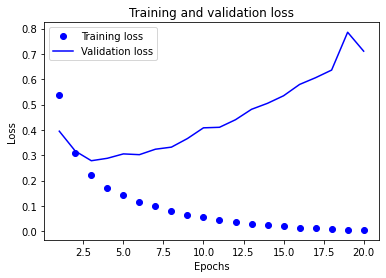

In [7]:
plot_loss()

Here is a plot of training and validation loss...

Training loss decreases through the run, confirming that SGD is optimising.   
*But* the validation loss decreases - and then increases!  
It seems validation loss is lowest at epoch 4 or 5.

In [8]:
def plot_acc():
    
    plt.clf()

    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, 'bo', label = 'Training acc')
    plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

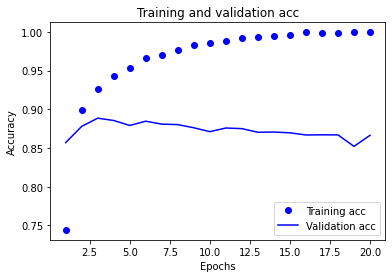

In [9]:
plot_acc()

The training accuracy approaches 1 - pretty good. The validation accuracy peaks early in run.

The model has been overtrained - it fits the training set too closely and begins to fail on unseen data

The learned representations are too specific

An example of **overfitting**

The model has been overtrained - it fits the training set too closely and begins to fail on the unseen, validation data. The learned representations are too specific - an example of 'overfitting'

We should stop training just as overfitting kicks in - at 4 epochs

Retrain for 4 epochs and evaluate the neywork on the complete test set

We should stop training just as overfitting kicks in - at 4 epochs. And then retrain a newly initialised network for 4 epochs. We then evaluate the network on the complete test set

In [10]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16 ,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 4, batch_size = 512)

results = model.evaluate(x_test, y_test)

results

Epoch 1/4
49/49 [==============================] - 3s 15ms/step - loss: 0.4958 - accuracy: 0.8098
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2862 - accuracy: 0.9043
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2126 - accuracy: 0.9257
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2991 - accuracy: 0.8800


[0.29905954003334045, 0.8799999952316284]

Note that a fresh network will training on the complete training set - not the partial training set. Now that we know th optimal epochs, we want to give the network as many samples as possible... the network has been trained and evaluated on the test set. The accuracy is 88% - not bad for a simple network. State-of-the-art networks should hit 95% accuracy. 